In [22]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt

In [23]:
# 确认device 以及 记录目录
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
logdir = 'evaluate/'  # 存放log的目录
loglist = os.listdir(logdir)

# 初始化原始数据字典
element_dict = {'train_acc':[],'train_loss':[],'validate_acc':[],'validate_loss':[],'validate_miou':[]}
# rawdata = np.load()
for log in loglist:
    # 读入一个pth文件，包含了该part的所有指标
    rawdata = torch.load(logdir+log, map_location=device)
    # train_acc.append(rawdata['train_acc'])
    
    for element in rawdata:
        # 遍历获取所有指标的数据，并添加到此前定义的字典
        element_dict[element].append(rawdata[element])


In [24]:
# 初始化用于存储平均值的空字典
avg_element_dict = {'train_acc':np.zeros((50)),'train_loss':np.zeros((50)),'validate_acc':np.zeros((50)),'validate_loss':np.zeros((50)),'validate_miou':np.zeros((50))}


for ele in element_dict:
    for data in element_dict[ele]:
        
        if type(data[0]) == torch.Tensor:
            # 损失值需要由tensor转化为numpy
            renew = []
            for each in data:
                renew.append(each.detach().cpu().numpy())
            avg_element_dict[ele] += renew
        else:
            avg_element_dict[ele] += data
    avg_element_dict[ele] /= len(element_dict[ele])
# print(avg_element_dict)

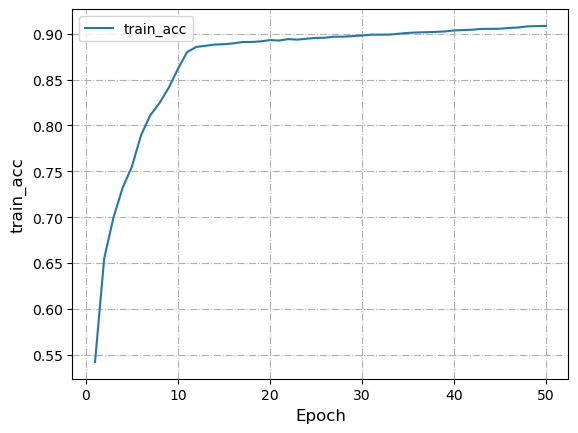

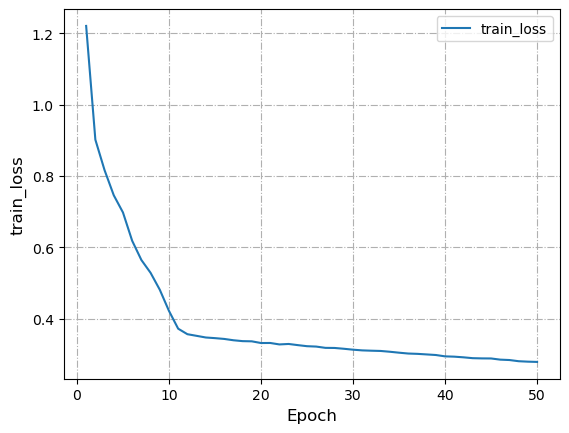

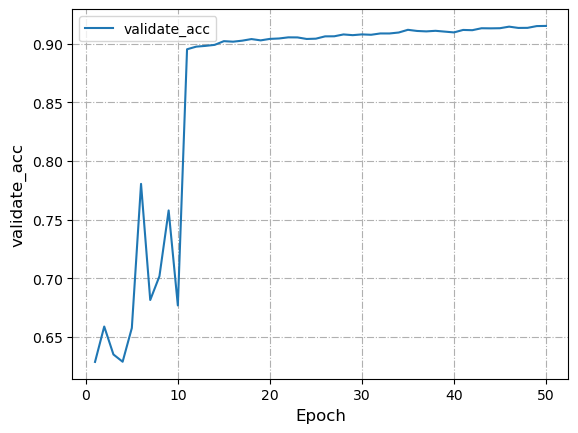

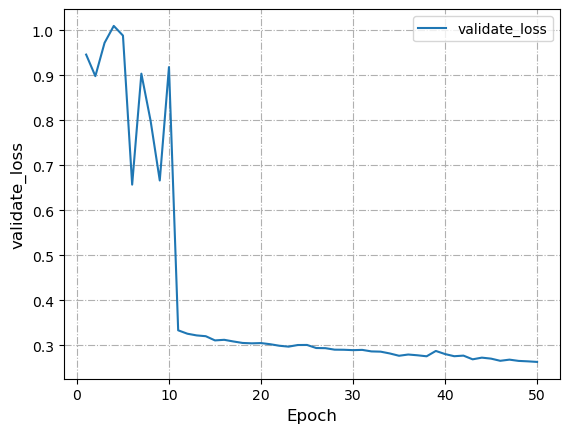

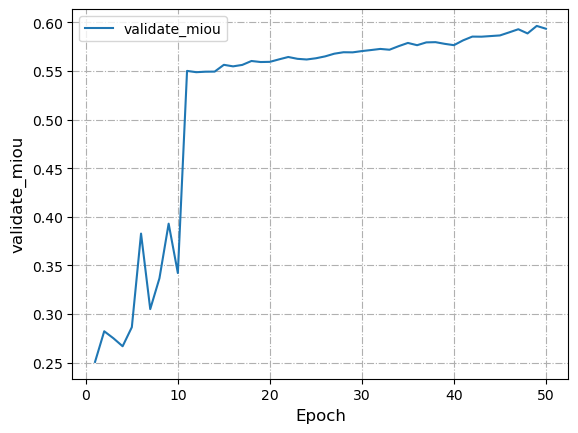

In [25]:
epoch = range(1, 51)
for ele in avg_element_dict:
    fig = plt.figure()

    ax = fig.add_subplot(111)

    l, = plt.plot(epoch,avg_element_dict[ele])

    # 增加图例
    ax.legend([ele],loc=0)

    # 增加网格线
    ax.grid(linestyle='-.')

    # 坐标轴命名
    ax.set_xlabel('Epoch',size=12)
    ax.set_ylabel(ele,size=12)